In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 286s 2us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

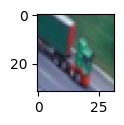

In [11]:
plot_sample(50)

In [12]:
dir(y_train)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
classes[y_train[3][0]]

'deer'

In [23]:
y_test.shape

(10000, 1)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [29]:
type(y_train[0][0])

numpy.uint8

In [24]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [30]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8125 - accuracy: 0.3554
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.6216 - accuracy: 0.4286
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5404 - accuracy: 0.4559
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4813 - accuracy: 0.4767
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4321 - accuracy: 0.4956
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3879 - accuracy: 0.5128
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3521 - accuracy: 0.5251
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3140 - accuracy: 0.5381
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2806 - accuracy: 0.5513
Epoch 10/10
1563/1563 [==============================] - 63s 40m

In [32]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 3s 8ms/step


'cat'

In [33]:
classes[y_test[0][0]]

'cat'

In [37]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 3s 8ms/step - loss: 1.3490 - accuracy: 0.5198


[1.3490041494369507, 0.5198000073432922]

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)